In [3]:
# Supervised Machine Learning Mini Project using mushroom dataset
# Steps:
# Data preprocessing, cleaning, missing value?, vectorize?, correlation check, handling outliers(scalers),
# visualisation, data splitting, train & test model, test accuracy etc, plot accuracy,
# deploy on streamlite

# Importing all necessary libraries

import numpy as np # linear algebra
import matplotlib.pyplot as plt #grapghs
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #graphs
import klib #EDA tool

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier


According to the information in the dataset, the class (edible=e, poisonous=p.

The problem should be addressed by creating binary classification models.

Throughout this notebook, I will create different models and compare their performance accordingly.

In [ ]:
# Loading the datasets.
path = "/content/drive/MyDrive/mushrooms.csv"
df = pd.read_csv(path)

# Getting info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# EDA / Exploratory Data Analysis
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.describe().round(2).style.background_gradient()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
# No missing value
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df.columns.values

array(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'], dtype=object)

In [ ]:
# Use klib to clean data. To remove duplicates etc.
# To reduce memory, so that it helps when computing codes for visualisation.

cleaned_df = klib.data_cleaning(df)

Shape of cleaned data: (8124, 22)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 1
     of which 1 single valued.     Columns: ['veil_type']
Dropped missing values: 0
Reduced memory by at least: 1.25 MB (-87.41%)



e    4208
p    3916
Name: class, dtype: int64


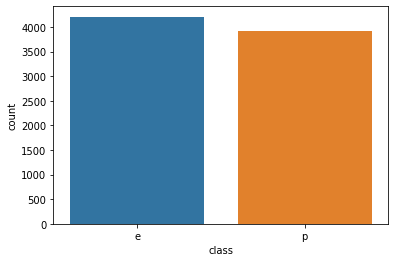

In [ ]:
target = 'class'
ax = sns.countplot(x=target,data=cleaned_df)
print(cleaned_df[target].value_counts())

# It can be seen that there are very similar samples of both poisonous and edible mushrooms.
# No oversampling

In [ ]:
cleaned_df.columns.values

array(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size',
       'gill_color', 'stalk_shape', 'stalk_root',
       'stalk_surface_above_ring', 'stalk_surface_below_ring',
       'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color',
       'ring_number', 'ring_type', 'spore_print_color', 'population',
       'habitat'], dtype=object)

<Figure size 1008x432 with 0 Axes>

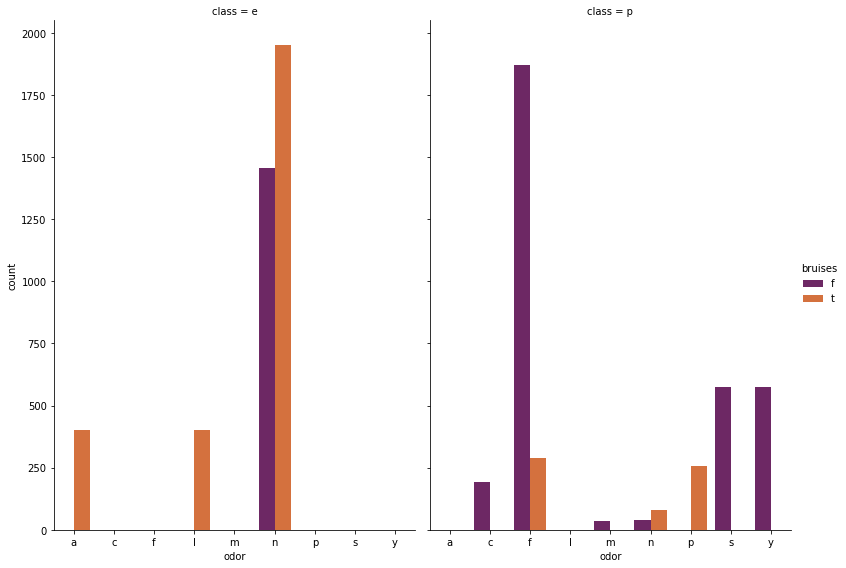

In [ ]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="odor", hue="bruises", col="class",
                data=cleaned_df, kind="count",
                height=8, aspect=.7 , palette = 'inferno');

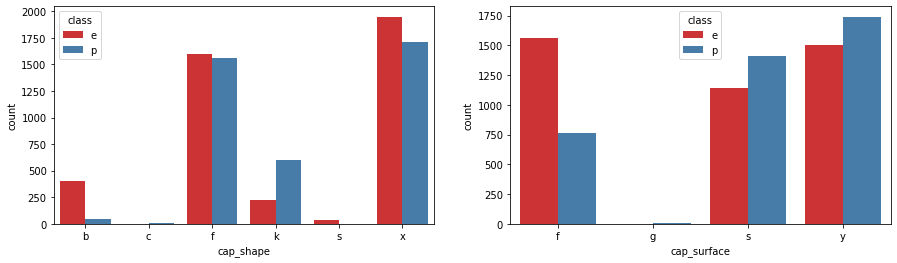

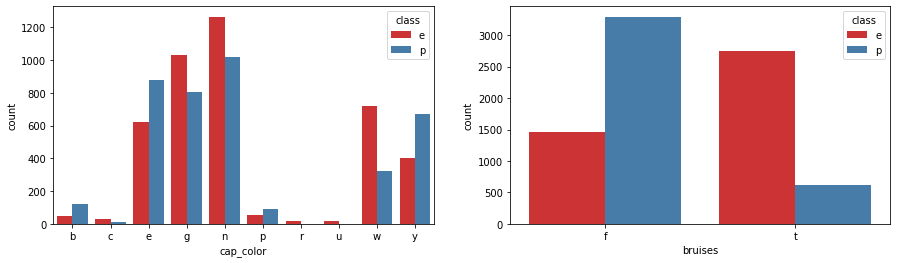

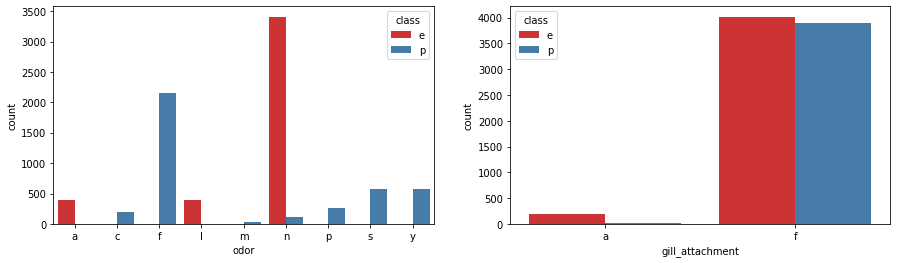

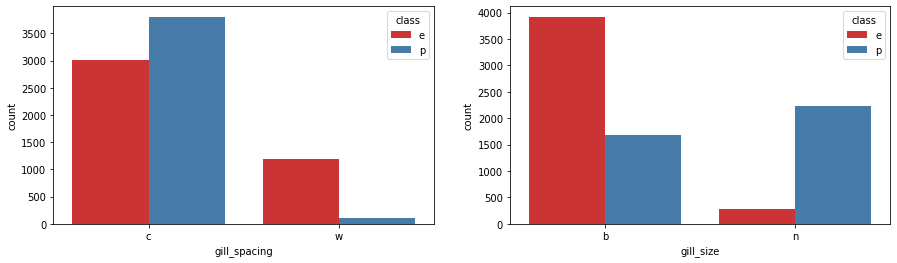

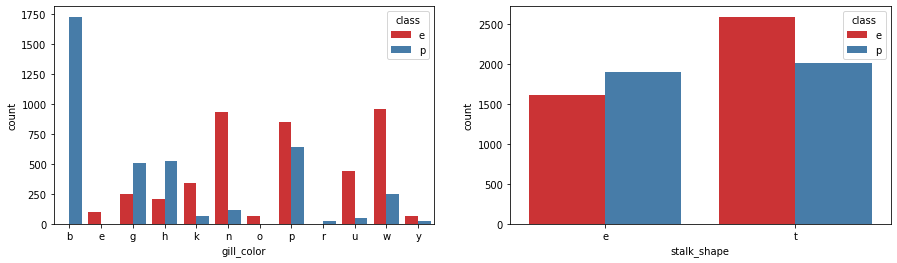

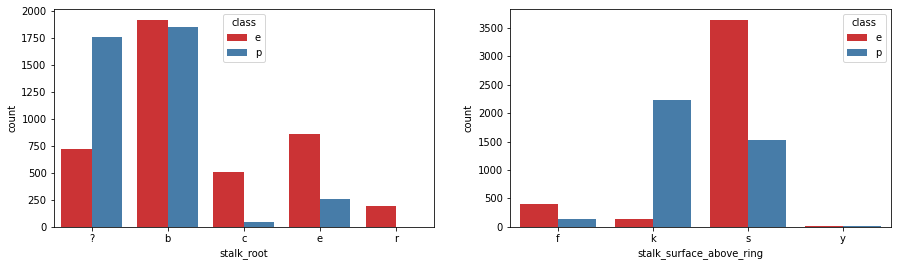

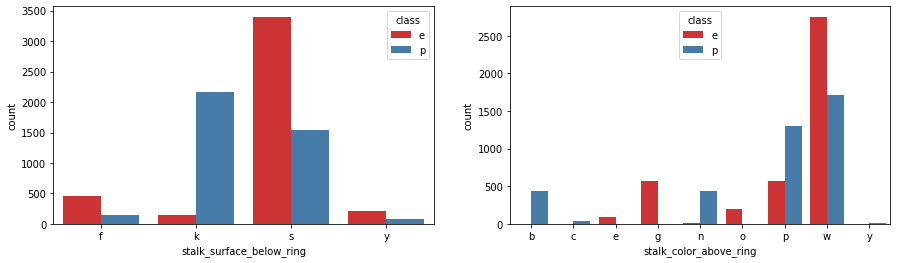

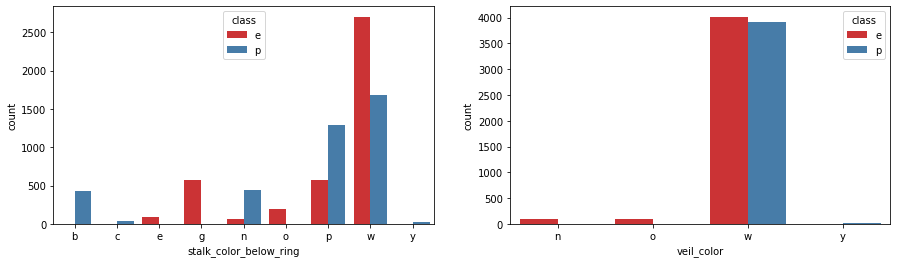

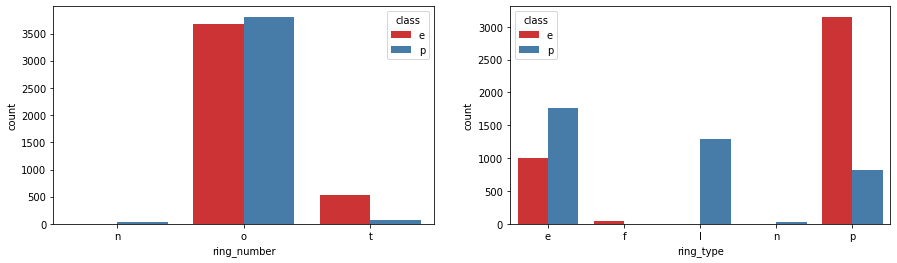

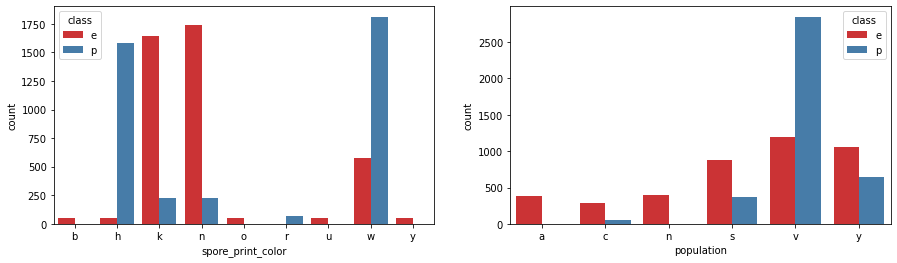

In [ ]:
for k in range(1,20,2):
    fig, ax =plt.subplots(1,2,figsize=(15, 4))
    sns.countplot(x = cleaned_df.columns[k], hue = 'class', data=cleaned_df, palette="Set1", ax=ax[0])
    sns.countplot(x = cleaned_df.columns[k+1], hue = 'class', data=cleaned_df, palette="Set1", ax=ax[1])
    plt.show()

In [ ]:
#Replace unique values in Class column to 0 and 1

df['class'] = df["class"].map({ 'e': 1, 'p': 0})


In [ ]:
#convert categorical values in to numeric
df_features=df.drop('class',axis=1)
df_features=pd.get_dummies(df_features, drop_first=True)


[1.27526703e-04 1.10887981e-03 5.83053822e-04 5.77959901e-04
 1.16421133e-03 3.36408717e-04 8.54421842e-03 3.00552304e-03
 5.33099790e-04 1.00120230e-03 2.14819689e-03 1.47948478e-03
 2.65547897e-03 2.92317051e-04 2.21855861e-04 4.34612726e-03
 6.59193872e-03 3.57678622e-02 1.27170873e-02 7.69878896e-02
 5.80258944e-03 1.24459071e-03 1.56311040e-01 2.03676989e-02
 1.00109573e-02 9.76951668e-03 1.85365656e-03 2.54351843e-02
 8.26735096e-02 2.60547479e-04 7.57066817e-04 9.12260441e-04
 8.82102796e-04 3.49289412e-03 6.08509276e-05 4.52428247e-04
 2.22001741e-03 1.30282200e-03 3.76820464e-03 2.53155422e-04
 2.23092817e-02 1.71625891e-02 1.41424752e-02 1.95881110e-02
 4.49994356e-03 4.73458672e-02 2.42040021e-02 2.79611734e-04
 5.12500376e-02 1.03435324e-02 4.67264388e-03 5.42206571e-04
 7.02266149e-04 1.28337884e-03 6.54952705e-04 4.81172825e-04
 3.02813582e-03 6.74343837e-03 3.54377264e-04 6.78979209e-04
 4.18378620e-04 3.54365362e-03 2.27887843e-03 1.06632512e-03
 2.90490058e-03 5.766728

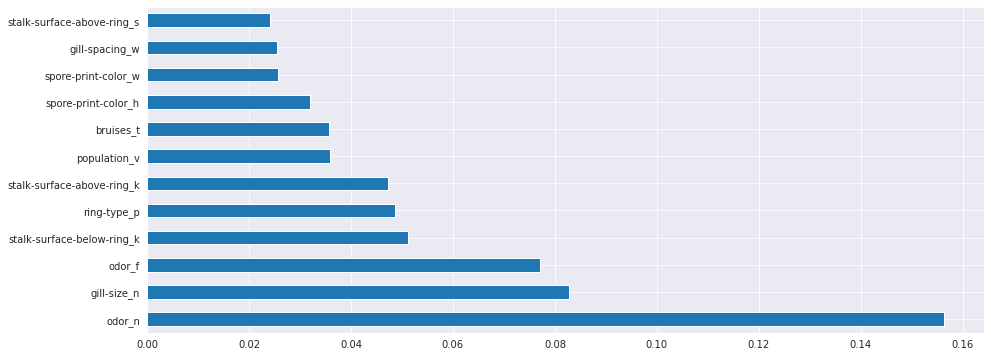

In [ ]:
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")

from sklearn.ensemble import ExtraTreesClassifier

X = df_features
y = df['class']

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()
# The below graph showed the features that has the highest contributions to the classification.

# **Attribute Information: classes: e = edible, p = poisonous**

***cap-shape:*** b=bell, c=conical, x=convex, f=flat, k=knobbed, s=sunken

***cap-surface:*** f=fibrous, g=grooves, y=scaly, s=smooth

***cap-color:*** n=brown, b=buff, c=cinnamon, g=gray, r=green, p=pink, u=purple,e=red, w=white, y=yellow

***bruises: ***t=bruises, f=no

***odor:*** a=almond, l=anise, c=creosote, y=fishy, f=foul, m=musty, n=none,p=pungent,s=spicy

***gill-attachment:*** a=attached, d=descending, f=free, n=notched

***gill-spacing:*** c=close, w=crowded, d=distant

***gill-size:*** b=broad, n=narrow

***gill-color:*** black=k, brown=n, buff=b,chocolate=h, gray=g, green=r,orange=o, pink=p, purple=u, red=e, white=w, yellow=y

***stalk-shape:*** enlarging=e, tapering=t

***stalk-root:*** bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r

***stalk-surface-above-ring:*** fibrous=f, scaly=y, silky=k, smooth=s

***stalk-surface-below-ring:*** fibrous=f, scaly=y, silky=k, smooth=s

***stalk-color-above-ring:*** brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y

***stalk-color-below-ring:*** brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y

***veil-type:*** partial=p, universal=u

***veil-color:*** brown=n, orange=o, white=w, yellow=y

***ring-number:*** none=n, one=o, two=t

***ring-type:*** cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

***spore-print-color:*** black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

***population:*** abundant=a, clustered=c, numerous=n, scattered=s, several=v,solitary=y

***habitat:*** grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [ ]:
# split the data in to independent features and target feature
X=df_features
y=df['class']

# split the data in to X_train,X_test, y_train and y_test

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.2)

In [ ]:

class1=LogisticRegression()
class1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predict the test data

y_pred= class1.predict(X_test)

In [ ]:
# compare the predicted values with actual values(y_test)
from sklearn.metrics import accuracy_score
accu_score= accuracy_score(y_test, y_pred)
print( 'the accuracy score=' , (accu_score))

the accuracy score= 1.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       1.00      1.00      1.00       852

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[773   0]
 [  0 852]]


In [ ]:
# I choose to use LazyClassifier for this task to get the most suitable models for the problem to be solved.
# Then, I would further choose the top few models to do hyper parameter tuning to get higher accuracy
# Below is how I defined and built the lazyclassifier. using the most optimum standardised / generalised parameters tuning

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

# 29 types of classifiers being used to develop the model and test their Accuracy levels.
#RESULT: 100% Accuracy on DATASET

100%|██████████| 29/29 [00:26<00:00,  1.09it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:19<00:00,  1.52it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,1.11
BaggingClassifier,1.00,1.00,1.00,1.00,0.24
XGBClassifier,1.00,1.00,1.00,1.00,1.52
SVC,1.00,1.00,1.00,1.00,2.50
SGDClassifier,1.00,1.00,1.00,1.00,0.08
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.16
RidgeClassifier,1.00,1.00,1.00,1.00,0.08
RandomForestClassifier,1.00,1.00,1.00,1.00,0.54
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.18


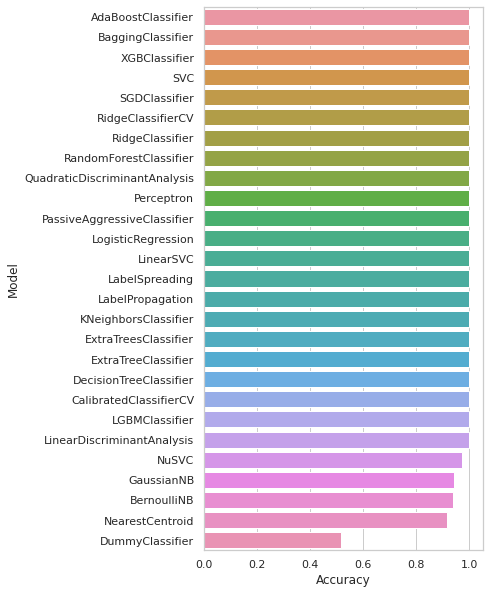

In [ ]:
# Plot of Accuracy level vs type of classifier on DATASET

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

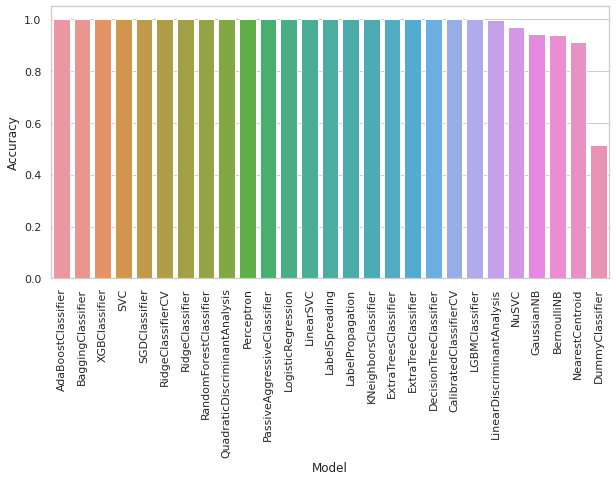

In [ ]:
# Plot of Accuracy level vs type of classifier on DATASET

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models_train.index, y="Accuracy", data=models_train)
plt.xticks(rotation=90)

In [1]:
pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 10.7 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [2]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Mushroom Supervised learning